# **Marriage Trends in India : Arranged Vs Love** 

#### **A Dataset of Marriages Analyzing Social, Economic, and Cultural Factors**

-----------------------------------------------------------------------------------------------------------

##### **Objective:**  To perform data preprocessing, cleaning, and exploratory data analysis (EDA) on the dataset, and create visualizations to uncover insights into love vs. arranged marriages using Python libraries like Pandas, NumPy, and Matplotlib

-----------------------------------------------------------------------------------------------------------

#### **Step 1: Import necessary libraries**

In [1]:
import pandas as pd

In [2]:
import numpy as np

#### **Step 2: Load the dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/0shanx/0shanx/refs/heads/main/marriage_data_india.csv')


#####  Display the first 5 rows of the dataset to get a quick look at the data

In [ ]:
print(df.head(10))

   ID Marriage_Type  Age_at_Marriage  Gender Education_Level Caste_Match  \
0   1          Love               23    Male        Graduate   Different   
1   2          Love               28  Female          School        Same   
2   3      Arranged               39    Male    Postgraduate        Same   
3   4      Arranged               26  Female          School   Different   
4   5          Love               32  Female        Graduate        Same   

  Religion Parental_Approval Urban_Rural Dowry_Exchanged Marital_Satisfaction  \
0    Hindu                No       Urban              No               Medium   
1    Hindu               Yes       Rural             Yes                  Low   
2   Muslim               Yes       Rural              No               Medium   
3    Hindu               Yes       Urban             Yes                  Low   
4    Hindu           Partial       Rural             Yes               Medium   

  Divorce_Status  Children_Count Income_Level  Years_Sin

#### **Step 3: Understand the dataset**

##### Check the columns in the dataset

In [5]:
print(df.columns)

Index(['ID', 'Marriage_Type', 'Age_at_Marriage', 'Gender', 'Education_Level',
       'Caste_Match', 'Religion', 'Parental_Approval', 'Urban_Rural',
       'Dowry_Exchanged', 'Marital_Satisfaction', 'Divorce_Status',
       'Children_Count', 'Income_Level', 'Years_Since_Marriage',
       'Spouse_Working', 'Inter-Caste', 'Inter-Religion'],
      dtype='object')


##### Check the data types of each column

In [6]:
print(df.dtypes)

ID                       int64
Marriage_Type           object
Age_at_Marriage          int64
Gender                  object
Education_Level         object
Caste_Match             object
Religion                object
Parental_Approval       object
Urban_Rural             object
Dowry_Exchanged         object
Marital_Satisfaction    object
Divorce_Status          object
Children_Count           int64
Income_Level            object
Years_Since_Marriage     int64
Spouse_Working          object
Inter-Caste             object
Inter-Religion          object
dtype: object


##### Check for missing values in each column

In [7]:
print(df.isnull().sum())

ID                      0
Marriage_Type           0
Age_at_Marriage         0
Gender                  0
Education_Level         0
Caste_Match             0
Religion                0
Parental_Approval       0
Urban_Rural             0
Dowry_Exchanged         0
Marital_Satisfaction    0
Divorce_Status          0
Children_Count          0
Income_Level            0
Years_Since_Marriage    0
Spouse_Working          0
Inter-Caste             0
Inter-Religion          0
dtype: int64


##### Check the shape of the dataset (number of rows and columns)

In [8]:
print(df.shape)

(10000, 18)


Display summary statistics for numerical columns

In [9]:
print(df.describe())

                ID  Age_at_Marriage  Children_Count  Years_Since_Marriage
count  10000.00000     10000.000000    10000.000000          10000.000000
mean    5000.50000        28.503800        2.508800             24.973800
std     2886.89568         6.279564        1.695467             14.054838
min        1.00000        18.000000        0.000000              1.000000
25%     2500.75000        23.000000        1.000000             13.000000
50%     5000.50000        29.000000        3.000000             25.000000
75%     7500.25000        34.000000        4.000000             37.000000
max    10000.00000        39.000000        5.000000             49.000000


#### **Step 4: Handle missing values (if any)**

##### **Option 1:** Drop rows with missing values (if the dataset is large enough)
##### df = df.dropna() 

##### **Option 2:** Fill missing values with mean, median, or mode
##### **For numerical columns**, fill missing values with the mean
##### >df['column_name'].fillna(df['column_name'].mean(), inplace=True)

##### **For categorical columns**, fill missing values with the mode
##### >df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)

##### **As Our data is having no missing values so we skip this part**

#### **Step 5: Remove duplicate rows (if any)**

In [10]:
df = df.drop_duplicates()

#### **Step 6: Data Cleaning & Transformation**

##### Convert categorical variables into numerical form

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
df['Marriage_Type'] = le.fit_transform(df['Marriage_Type'])

##### Standardize/Normalize numerical features (if needed)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
df['Age_at_Marriage'] = scaler.fit_transform(df[['Age_at_Marriage']])

##### Handle outliers (if needed)

In [17]:
Q1 = df['Age_at_Marriage'].quantile(0.25)

In [18]:
Q3 = df['Age_at_Marriage'].quantile(0.75)

In [19]:
IQR = Q3 - Q1

In [20]:
df = df[~((df['Age_at_Marriage'] < (Q1 - 1.5 * IQR)) | (df['Age_at_Marriage'] > (Q3 + 1.5 * IQR)))]

##### Rename inconsistent column names (if needed)

In [21]:
df.rename(columns={'Marriage_Type': 'Type_Of_Marriage'}, inplace=True)

#### **Step 7: Exploratory Data Analysis (EDA)**

##### After Cleaning Analysis

In [22]:
print(df.dtypes)

ID                        int64
Type_Of_Marriage          int64
Age_at_Marriage         float64
Gender                   object
Education_Level          object
Caste_Match              object
Religion                 object
Parental_Approval        object
Urban_Rural              object
Dowry_Exchanged          object
Marital_Satisfaction     object
Divorce_Status           object
Children_Count            int64
Income_Level             object
Years_Since_Marriage      int64
Spouse_Working           object
Inter-Caste              object
Inter-Religion           object
dtype: object


In [23]:
print(df.describe())

                ID  Type_Of_Marriage  Age_at_Marriage  Children_Count  \
count  10000.00000      10000.000000     1.000000e+04    10000.000000   
mean    5000.50000          0.397800     2.913225e-16        2.508800   
std     2886.89568          0.489468     1.000050e+00        1.695467   
min        1.00000          0.000000    -1.672779e+00        0.000000   
25%     2500.75000          0.000000    -8.765059e-01        1.000000   
50%     5000.50000          0.000000     7.902217e-02        3.000000   
75%     7500.25000          1.000000     8.752956e-01        4.000000   
max    10000.00000          1.000000     1.671569e+00        5.000000   

       Years_Since_Marriage  
count          10000.000000  
mean              24.973800  
std               14.054838  
min                1.000000  
25%               13.000000  
50%               25.000000  
75%               37.000000  
max               49.000000  


In [35]:
df_numeric = df.select_dtypes(include=['number'])

In [36]:
df_numeric.corr()

,ID,Type_Of_Marriage,Age_at_Marriage,Children_Count,Years_Since_Marriage
ID,1.000000,-0.004168,-0.004289,-0.006075,-0.006063
Type_Of_Marriage,-0.004168,1.000000,0.005853,-0.016993,-0.021963
Age_at_Marriage,-0.004289,0.005853,1.000000,-0.013285,0.003573
Children_Count,-0.006075,-0.016993,-0.013285,1.000000,0.002335
Years_Since_Marriage,-0.006063,-0.021963,0.003573,0.002335,1.000000


#### **Step 8: Data Visualization**

##### Import visualization libraries

In [24]:
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

#### **Histogram**

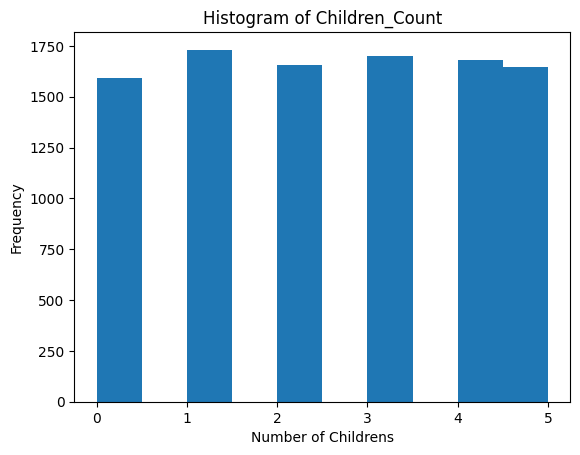

In [29]:
plt.hist(df['Children_Count'], bins=10)
plt.title('Histogram of Children_Count')
plt.xlabel('Number of Childrens')
plt.ylabel('Frequency')
plt.show()


##### Box Plot (To detect outliers)

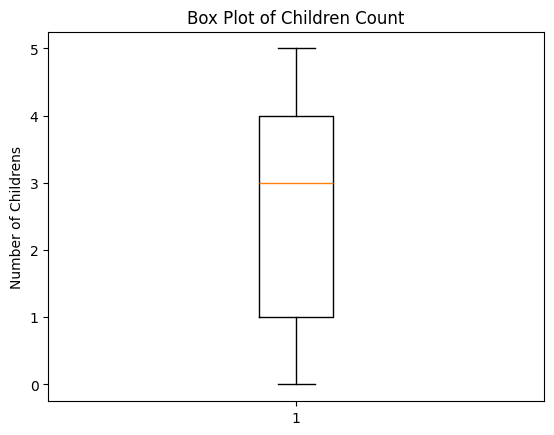

In [30]:
plt.boxplot(df['Children_Count'])
plt.title('Box Plot of Children Count')
plt.ylabel('Number of Childrens')
plt.show()


##### Scatter Plot (To find relationships between two numerical features)

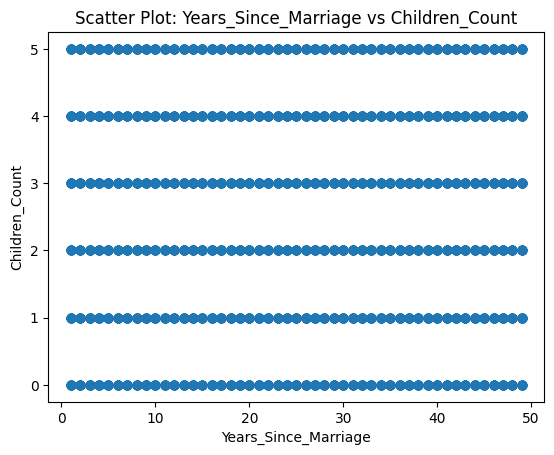

In [31]:
plt.scatter(df['Years_Since_Marriage'], df['Children_Count'])
plt.title('Scatter Plot: Years_Since_Marriage vs Children_Count')
plt.xlabel('Years_Since_Marriage')
plt.ylabel('Children_Count')
plt.show()

##### Bar Chart (For categorical data representation)

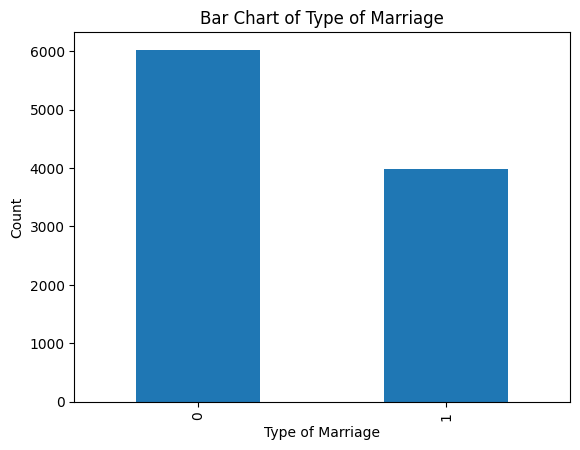

In [32]:
df['Type_Of_Marriage'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Type of Marriage')
plt.xlabel('Type of Marriage')
plt.ylabel('Count')
plt.show()

##### Heatmap (To visualize correlations)

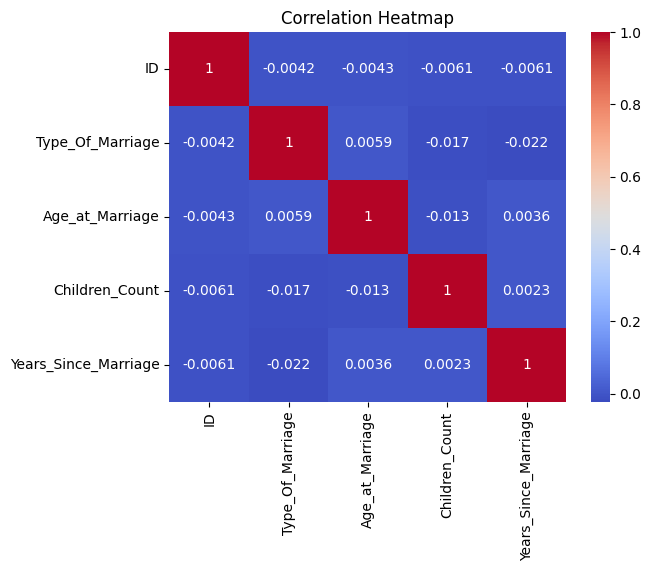

In [37]:
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()